<a href="https://colab.research.google.com/github/ayushinag237-droid/econ_stuff/blob/main/Crude_oil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance


In [ ]:
import yfinance as yf
import pandas as pd

# Download 5 years of monthly data
ongc = yf.download("ONGC.NS", period="5y", interval="1mo")
brent = yf.download("BZ=F", period="5y", interval="1mo")

# Keep only closing prices
ongc = ongc['Close']
brent = brent['Close']

# Combine & compute returns
df = pd.concat([brent, ongc], axis=1)
df.columns = ['Brent','ONGC']

returns = df.pct_change().dropna()

print(returns.head())


/tmp/ipython-input-2834594560.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ongc = yf.download("ONGC.NS", period="5y", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2834594560.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  brent = yf.download("BZ=F", period="5y", interval="1mo")
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-2834594560.py:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


               Brent      ONGC
Date                          
2021-04-01  0.058388  0.058737
2021-05-01  0.035390  0.050855
2021-06-01  0.078989  0.035636
2021-07-01  0.015972 -0.020391
2021-08-01  0.000000  0.045533


In [ ]:
import statsmodels.api as sm

X = sm.add_constant(returns['Brent'])
y = returns['ONGC']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                   ONGC   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     9.406
Date:                Thu, 05 Feb 2026   Prob (F-statistic):            0.00328
Time:                        13:41:40   Log-Likelihood:                 73.590
No. Observations:                  60   AIC:                            -143.2
Df Residuals:                      58   BIC:                            -139.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0225      0.009      2.411      0.0

visualizn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style("whitegrid")   # corporate clean look


1. Co-movement over time (explain)


In [ ]:
plt.figure(figsize=(11,5))
sns.lineplot(data=returns[['Brent','ONGC']])
plt.title("Monthly Returns: Brent Crude vs ONGC")
plt.ylabel("Return")
plt.xlabel("Time")
plt.show()


NameError: name 'plt' is not defined

2. Scatter + OLS Regression

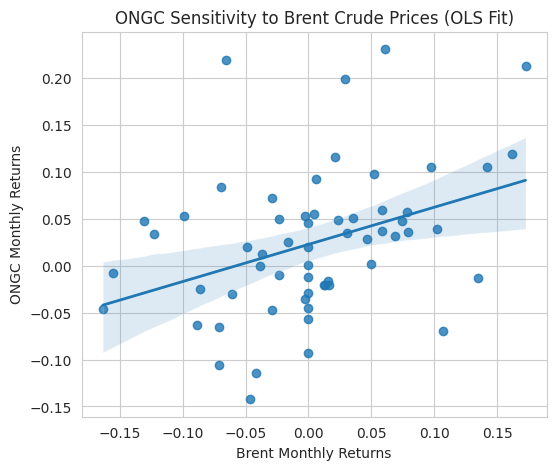

In [ ]:
plt.figure(figsize=(6,5))

sns.regplot(
    x='Brent',
    y='ONGC',
    data=returns,
    ci=95,
    line_kws={'linewidth':2}
)

plt.title("ONGC Sensitivity to Brent Crude Prices (OLS Fit)")
plt.xlabel("Brent Monthly Returns")
plt.ylabel("ONGC Monthly Returns")
plt.show()


3. Rolling Correlation

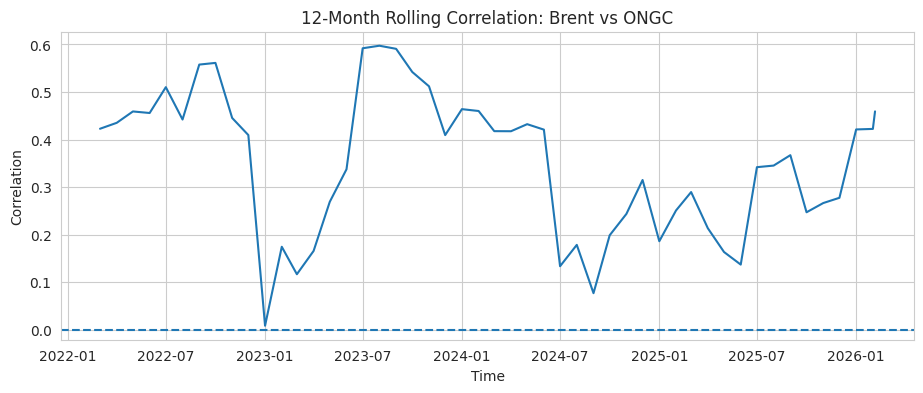

In [ ]:
rolling_corr = returns['Brent'].rolling(12).corr(returns['ONGC'])

plt.figure(figsize=(11,4))
sns.lineplot(x=rolling_corr.index, y=rolling_corr.values)
plt.axhline(0, linestyle='--')

plt.title("12-Month Rolling Correlation: Brent vs ONGC")
plt.ylabel("Correlation")
plt.xlabel("Time")
plt.show()


4. Residual Behaviour

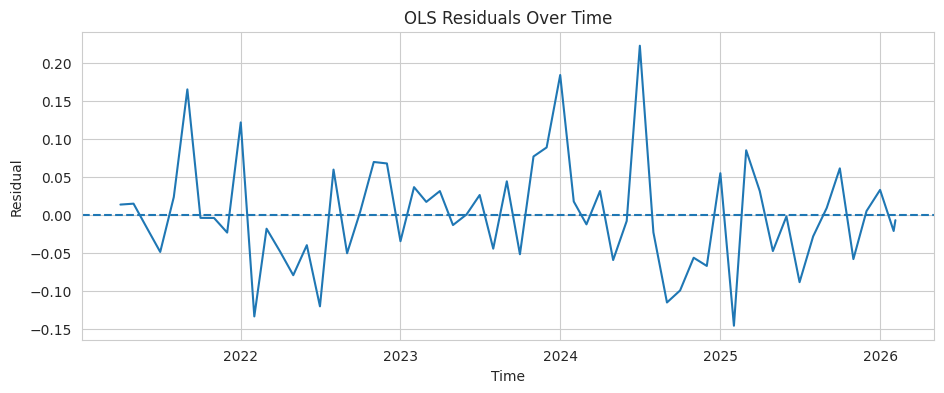

In [ ]:
residuals = model.resid

plt.figure(figsize=(11,4))
sns.lineplot(x=residuals.index, y=residuals.values)
plt.axhline(0, linestyle='--')

plt.title("OLS Residuals Over Time")
plt.ylabel("Residual")
plt.xlabel("Time")
plt.show()


5.Distribution of returns

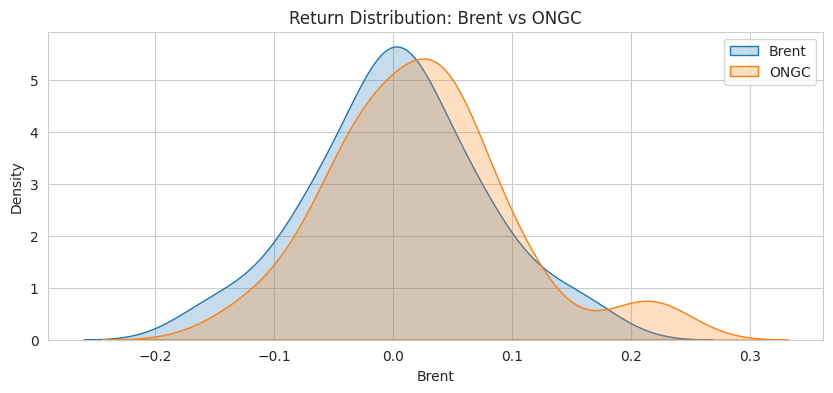

In [ ]:
plt.figure(figsize=(10,4))

sns.kdeplot(returns['Brent'], label='Brent', fill=True)
sns.kdeplot(returns['ONGC'], label='ONGC', fill=True)

plt.title("Return Distribution: Brent vs ONGC")
plt.legend()
plt.show()
